<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Visualização da classificação no espaço de Cullen-Frey

**Descrição da atividade**: Este documento apresenta a classificação das variáveis `Número Diário de Casos (NDC)`, `Número Diário de Mortes (NDM)` e `Número Diário de Testes (NDT)` no espaço de Cullen-Frey.

In [1]:
import scipy.stats
import numpy as np
import pandas as pd
from math import ceil
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

import warnings
warnings.filterwarnings("ignore")

from utils import cullen_frey_subplot # Função adaptada para os subplots

Para iniciar, os dados utilizados são carregados

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_06_03.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])
data_owd = data_owd[data_owd['date'] >= '2020-04-01']

In [3]:
bra = data_owd[data_owd['iso_code'] == 'BRA']
can = data_owd[data_owd['iso_code'] == 'CAN']
mex = data_owd[data_owd['iso_code'] == 'MEX']
cub = data_owd[data_owd['iso_code'] == 'CUB']
rus = data_owd[data_owd['iso_code'] == 'RUS']

**Número diário de casos**

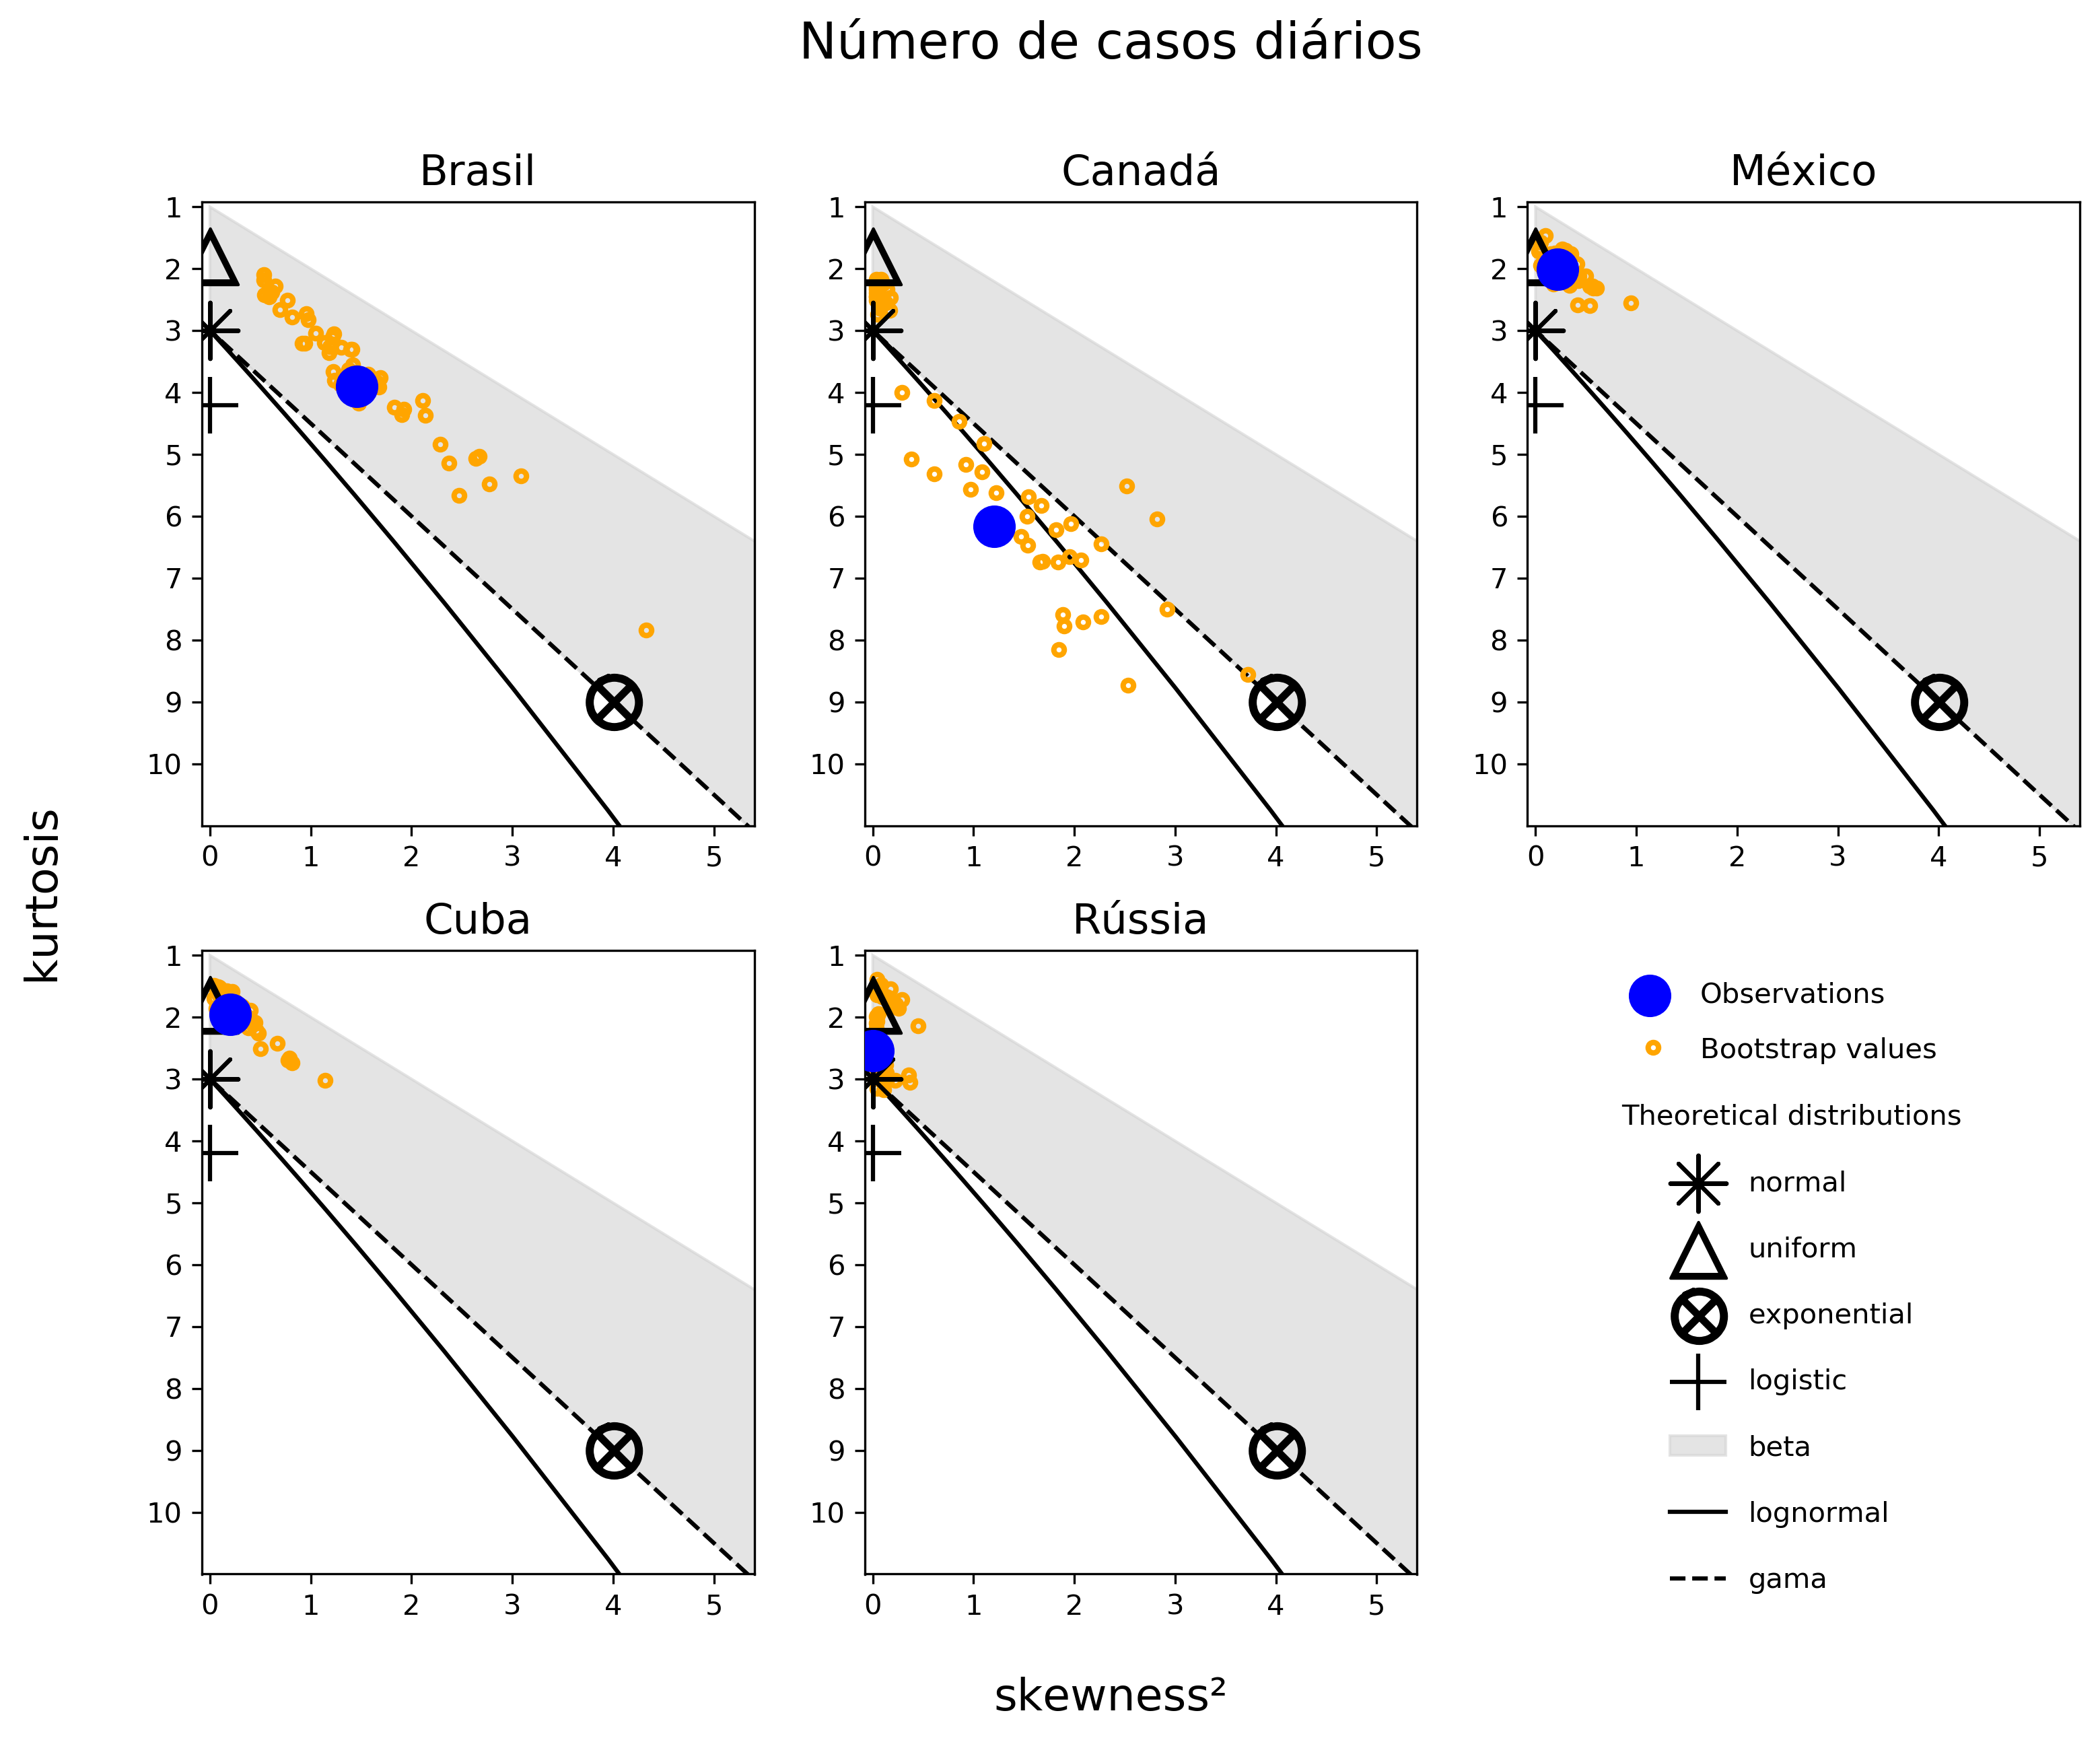

In [4]:
fig = plt.figure(figsize=(12, 9), dpi = 300)

ax = plt.subplot(2, 3, 1)
cullen_frey_subplot(bra.new_cases, boot = 50, legend=False, title = 'Brasil', xlabel = '', ylabel = '')

plt.subplot(2, 3, 2, sharex = ax, sharey = ax)
cullen_frey_subplot(can.new_cases, boot = 50, legend=False, title = 'Canadá', 
                        xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 3, 3, sharex = ax, sharey = ax)
cullen_frey_subplot(mex.new_cases, boot = 50, legend=False, title = 'México', xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 3, 4, sharex = ax, sharey = ax)
cullen_frey_subplot(cub.new_cases, boot = 50, legend=False, title = 'Cuba', xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 3, 5, sharex = ax, sharey = ax)
cullen_frey_subplot(rus.new_cases, boot = 50, legend=True, title = 'Rússia', xlabel = '', ylabel = '',
                       legend_loc1 = (1.35, 0.80), legend_loc2 = (1.35, -0.05), lim = False)

plt.suptitle("Número de casos diários", y=0.98, fontsize = 18)
fig.text(0.5, 0.05, 'skewness²', ha='center', fontsize = 16)
fig.text(0.05, 0.5, 'kurtosis', va='center', rotation='vertical', fontsize = 16)
plt.show()

**Número diário de mortes**

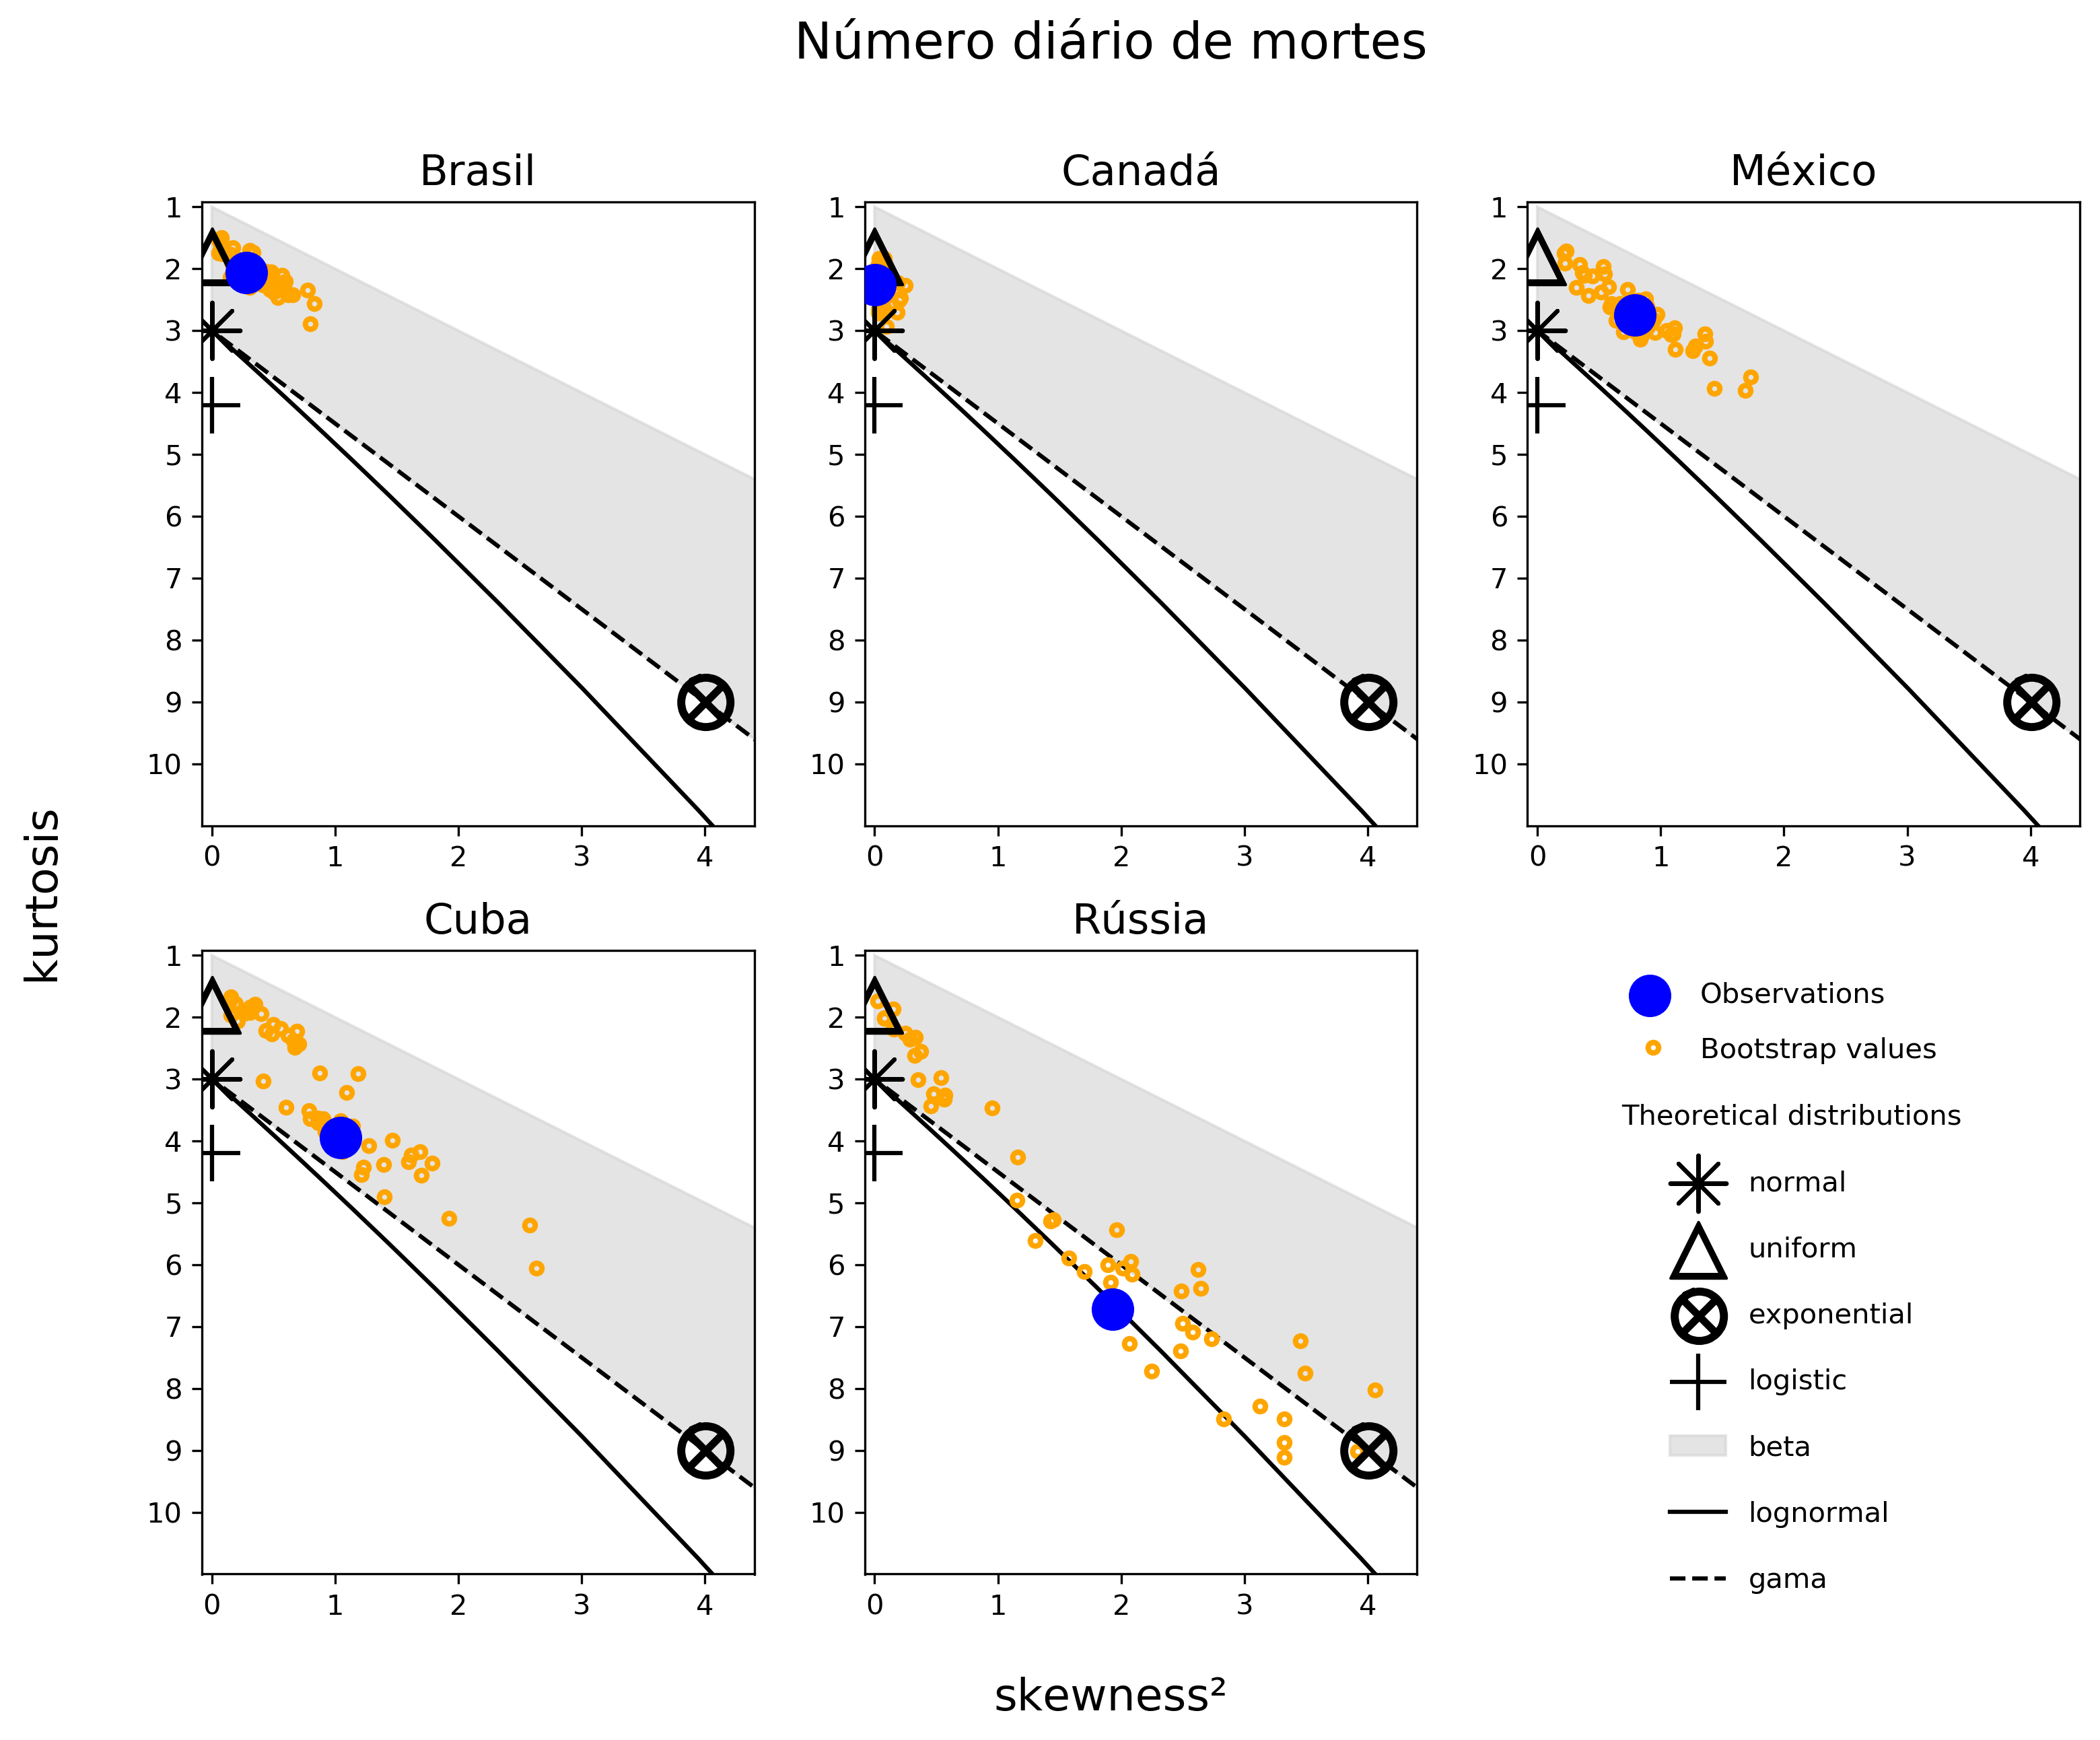

In [5]:
fig = plt.figure(figsize=(12, 9), dpi = 300)

ax = plt.subplot(2, 3, 1)
cullen_frey_subplot(bra.new_deaths, boot = 50, legend=False, title = 'Brasil', xlabel = '', ylabel = '')

plt.subplot(2, 3, 2, sharex = ax, sharey = ax)
cullen_frey_subplot(can.new_deaths, boot = 50, legend=False, title = 'Canadá', 
                        xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 3, 3, sharex = ax, sharey = ax)
cullen_frey_subplot(mex.new_deaths, boot = 50, legend=False, title = 'México', xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 3, 4, sharex = ax, sharey = ax)
cullen_frey_subplot(cub.new_deaths, boot = 50, legend=False, title = 'Cuba', xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 3, 5, sharex = ax, sharey = ax)
cullen_frey_subplot(rus.new_deaths, boot = 50, legend=True, title = 'Rússia', xlabel = '', ylabel = '',
                       legend_loc1 = (1.35, 0.80), legend_loc2 = (1.35, -0.05), lim = False)

plt.suptitle("Número diário de mortes", y=0.98, fontsize = 18)
fig.text(0.5, 0.05, 'skewness²', ha='center', fontsize = 16)
fig.text(0.05, 0.5, 'kurtosis', va='center', rotation='vertical', fontsize = 16)
plt.show()

**Número diário de testes**

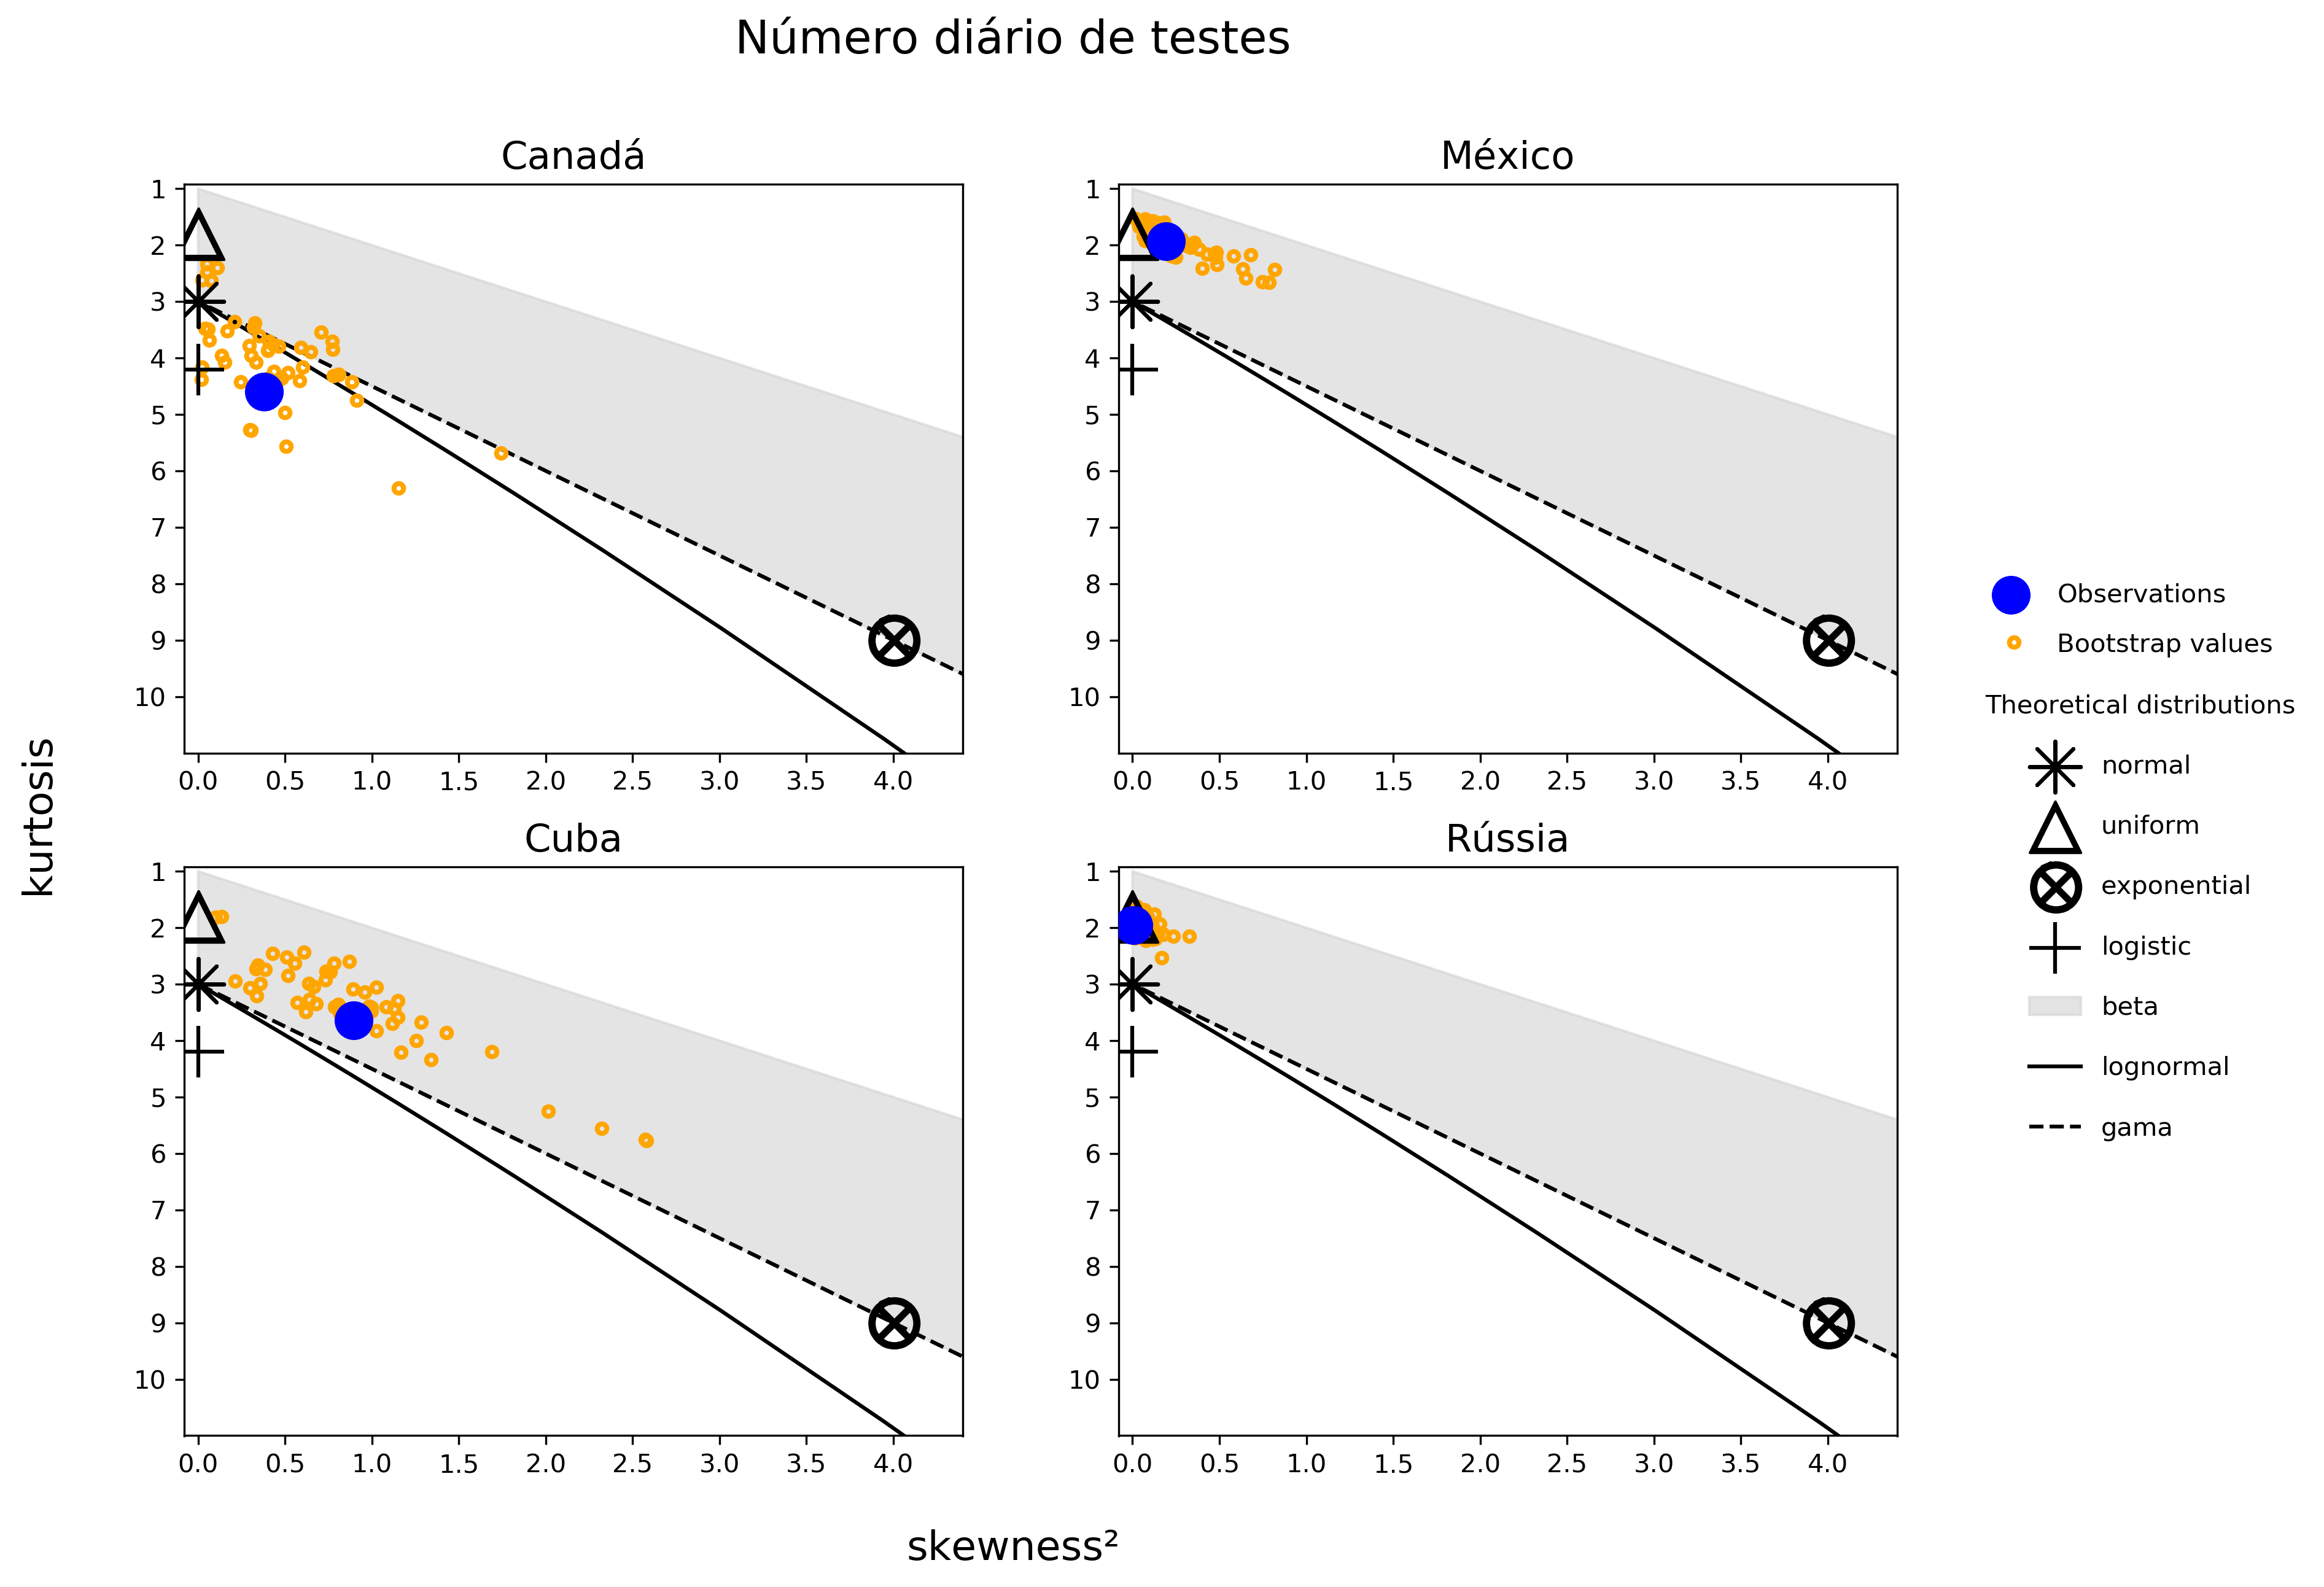

In [6]:
fig = plt.figure(figsize=(12, 9), dpi = 300)

ax = plt.subplot(2, 2, 1)
cullen_frey_subplot(can.new_tests.dropna(), boot = 50, legend=False, title = 'Canadá', 
                        xlabel = '', ylabel = '', lim = True)

plt.subplot(2, 2, 2, sharex = ax, sharey = ax)
cullen_frey_subplot(mex.new_tests.dropna(), boot = 50, legend=False, title = 'México', xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 2, 3, sharex = ax, sharey = ax)
cullen_frey_subplot(cub.new_tests.dropna(), boot = 50, legend=False, title = 'Cuba', xlabel = '', ylabel = '', lim = False)

plt.subplot(2, 2, 4, sharex = ax, sharey = ax)
cullen_frey_subplot(rus.new_tests.dropna(), boot = 50, legend=True, title = 'Rússia', xlabel = '', ylabel = '',
                       legend_loc1 = (1.10, 1.35), legend_loc2 = (1.10, 0.5), lim = False)

plt.suptitle("Número diário de testes", y=0.98, fontsize = 18)
fig.text(0.5, 0.05, 'skewness²', ha='center', fontsize = 16)
fig.text(0.05, 0.5, 'kurtosis', va='center', rotation='vertical', fontsize = 16)
plt.show()